## Matching labels
This script will compare two labelled images and convert the assigned labels in one image to resemble the labels in the first image.

In [9]:
import os
import biapol_utilities as biau
from skimage import io, measure, filters
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from functools import partial

%matplotlib notebook

### Load data
First, we load the example blobs image and threshold it to create a label map. 

In [2]:
blobs = biau.data.blobs()

<IPython.core.display.Javascript object>


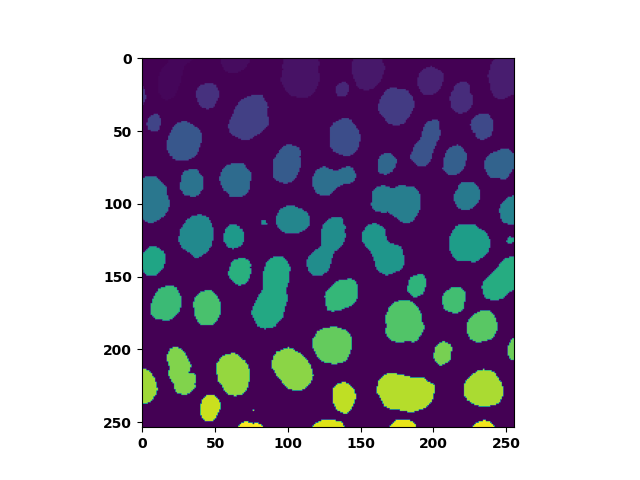

In [3]:
threshold = 128
imageA = (blobs > threshold).astype(np.uint8)
imageA_labelled = measure.label(imageA)

plt.imshow(imageA_labelled)

Let's create a second version of this image in which we shuffle the labels:

In [4]:
label_shuffle = np.arange(1, imageA_labelled.max()+1, 1)
np.random.shuffle(label_shuffle)
label_shuffle = np.append(np.asarray([0]), label_shuffle)  # append 0 at start of array - we don't want to shuffle background

imageB_labelled = label_shuffle[imageA_labelled]

Both images are not identical!

<IPython.core.display.Javascript object>


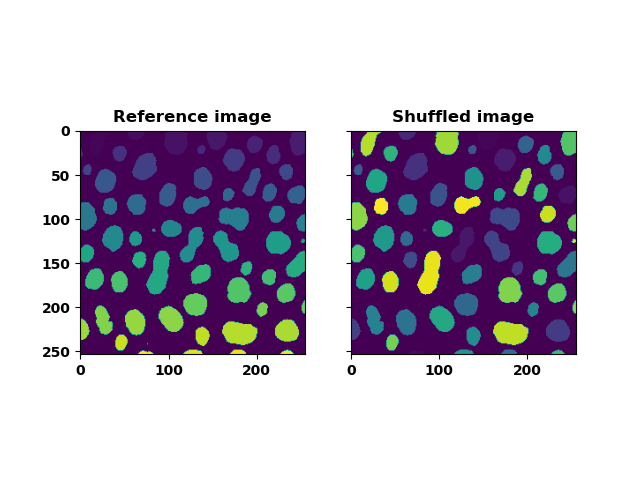

Number of labels in imageA: 63
Number of labels in imageB: 63


In [5]:
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
axes[0].imshow(imageA_labelled)
axes[0].set_title('Reference image')
axes[1].imshow(imageB_labelled)
axes[1].set_title('Shuffled image')

print(f'Number of labels in imageA: {imageA_labelled.max()}')
print(f'Number of labels in imageB: {imageB_labelled.max()}')

## Label-matching

Next, we can run the label matching. Biapol-utilities divides this process in three steps:
- Calculating the similarity between labels in the form of a similarity matrix **M**
- Filtering entries in **M**
- Matching labels from two images based on the remaining entries in **M**

### Default behaviour
Biapol utilites uses the following default approaches for these steps:
- Calculating similarity: Intersection over union between all labels
- Filtering entries in **M**: All entries between a default threshold (0.25) are set to zero.
- Matching labels: Labels with maximal similarity are matched.

The default procedure can be called using:

In [12]:
output = biau.label.match_labels(imageA_labelled, imageB_labelled)

### Custom behaviour
Next, we specify the methods used for each step:

In [13]:
metric_method = biau.label.intersection_over_union_matrix
filter_method = biau.label.suppressed_similarity
matching_method = biau.label.max_similarity

Now, these functions can be passed as arguments to the label matching function:

In [14]:
output = biau.label.match_labels(imageA_labelled, imageB_labelled,
                                metric_method=metric_method,
                                filter_method=filter_method,
                                matching_method=matching_method)

*Note*: Some of these argument functions have optional keyword arguments. For instance, `suppressed_similarity` will -  as the name suggests - suppress entries in the similarity matrix **M** that fall below a certain threshold, that defaults to 0.25. This may not be appropriate for some problems. In order to change the default behaviour, you can customize the suppression function as follows:

In [15]:
customized_filter_method = partial(biau.label.suppressed_similarity, threshold=0.1)

# Pass the new function to match_labels():
output = biau.label.match_labels(imageA_labelled, imageB_labelled,
                                metric_method=metric_method,
                                filter_method=customized_filter_method,
                                matching_method=matching_method)

Visualize the result:

<IPython.core.display.Javascript object>


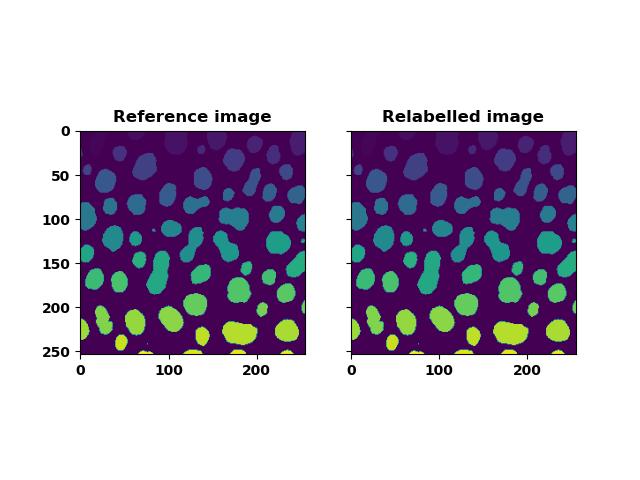

Text(0.5, 1.0, 'Relabelled image')

In [16]:
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
axes[0].imshow(imageA_labelled)
axes[0].set_title('Reference image')
axes[1].imshow(output)
axes[1].set_title('Relabelled image')